In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy.ndimage.filters import uniform_filter1d
%matplotlib inline

In [2]:
filenames1 = sorted(glob.glob('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab \
6/AST326 Lab 6 Data/March 14/MP_20190314*.pkl'))
filenames2 = sorted(glob.glob('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab \
6/AST326 Lab 6 Data/March 15/MP_20190315*.pkl'))

In [3]:
#March 14
d1 = []
for i in range(0, 36):
    with open(filenames1[i], 'rb') as f:
        d1.append(pickle.load(f, encoding='latin1'))
d1 = np.array(d1)
    
#March 15
d2 = []
for i in range(0, 13):
    with open(filenames2[i], 'rb') as f:
        d2.append(pickle.load(f, encoding='latin1'))
d2 = np.array(d2)

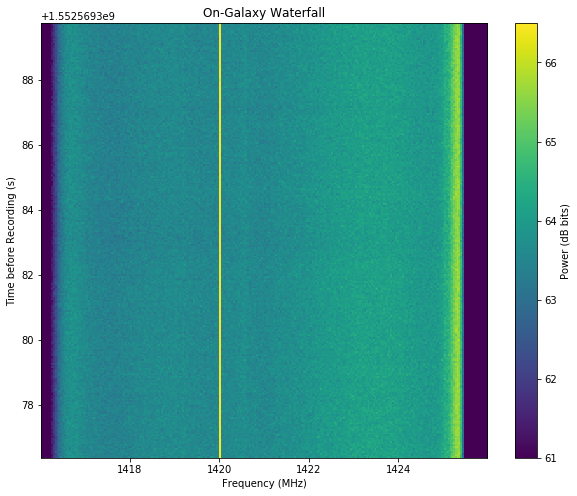

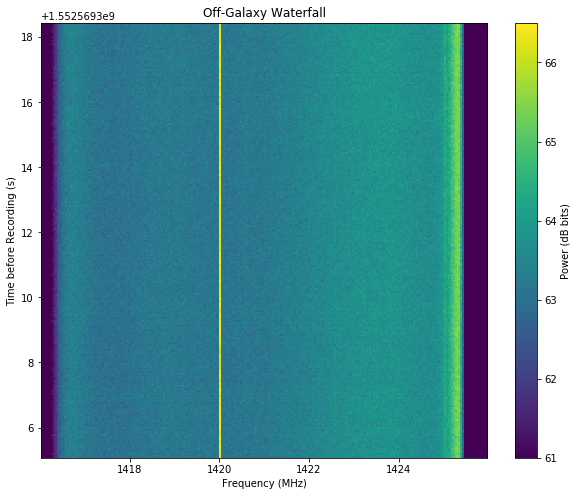

In [4]:
#Test with GP030
freqs = d1[12]["freqs"]
times30_on = d1[12]["times"]
times30_off = d1[11]["times"]
test_on = d1[12]['data'][:,:,0]
test_off = d1[11]['data'][:,:,0]

#Plot on gal
plt.figure(figsize=(10,8))
plt.imshow(10*np.log10(test_on), aspect='auto', vmax=66.5, vmin=61, \
           extent=[np.amin(freqs), np.amax(freqs), np.amin(times30_on), np.amax(times30_on)])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time before Recording (s)')
plt.title('On-Galaxy Waterfall')
plt.colorbar().set_label('Power (dB bits)', rotation=90)

#Plot off gal
plt.figure(figsize=(10,8))
plt.imshow(10*np.log10(test_off), aspect='auto', vmax=66.5, vmin=61, \
           extent=[np.amin(freqs), np.amax(freqs), np.amin(times30_off), np.amax(times30_off)])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time before Recording (s)')
plt.title('Off-Galaxy Waterfall')
plt.colorbar().set_label('Power (dB bits)', rotation=90)

(60, 67)

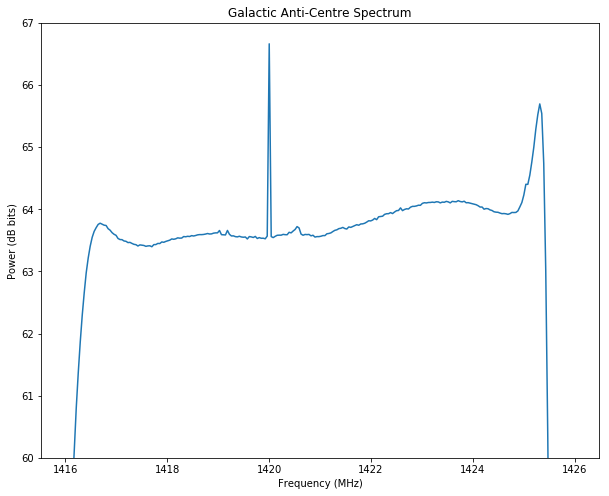

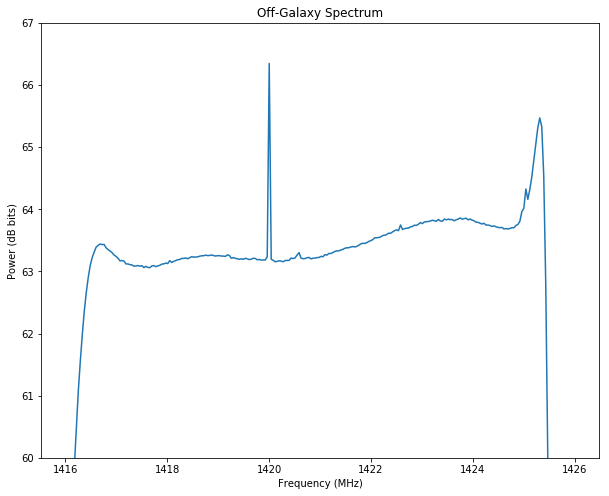

In [5]:
#Spectra
plt.figure(figsize=(10,8))
plt.plot(freqs, 10*np.log10(test_on.mean(axis=0)))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dB bits)')
plt.title('Galactic Anti-Centre Spectrum')
plt.ylim(60, 67)

plt.figure(figsize=(10,8))
plt.plot(freqs, 10*np.log10(test_off.mean(axis=0)))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dB bits)')
plt.title('Off-Galaxy Spectrum')
plt.ylim(60, 67)

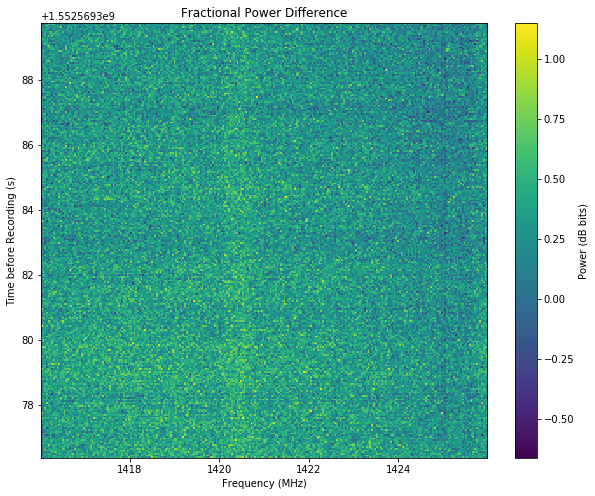

In [6]:
#Residuals
test_norm = test_on/test_off

plt.figure(figsize=(10,8))
plt.imshow(10*np.log10(test_norm), aspect='auto',\
          extent = (np.amin(freqs), np.amax(freqs), np.amin(times30_on), np.amax(times30_on)))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time before Recording (s)')
plt.title('Fractional Power Difference')
plt.colorbar().set_label('Power (dB bits)', rotation=90)

Text(0.5,1,'Fractional Power Difference')

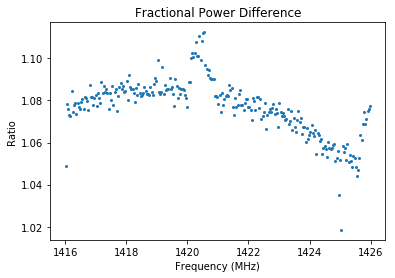

In [7]:
#Residuals 2D
plt.plot(freqs, test_norm.mean(axis=0), ls='', marker='o', markersize=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Ratio')
plt.title('Fractional Power Difference')

Text(0.5,1,'Masked Baseline Fit')

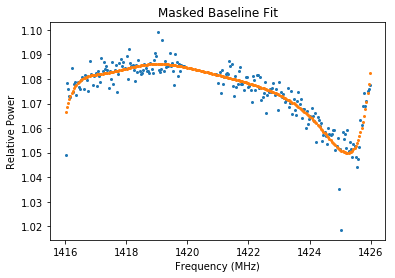

In [8]:
#De-trend the data
test_21cm = 1420.4 #MHz
q = np.where(np.abs(freqs - test_21cm) > 0.5) #exclude +/- 0.5MHz

deg = 9
dd = test_norm.mean(axis=0)
plt.plot(freqs[q], dd[q], ls='', marker='o', markersize=2)
fit = np.polyfit(freqs[q] - test_21cm, dd[q], deg)
plt.plot(freqs, np.polyval(fit, freqs - test_21cm), ls='', marker='o', markersize=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.title('Masked Baseline Fit')

Text(0.5,1,'Signal at Galactic Anti-Centre')

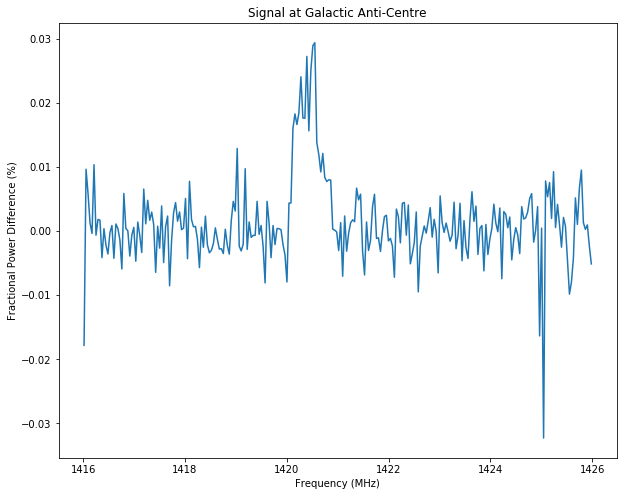

In [9]:
#De-trending data cont
ddd = dd - np.polyval(fit, freqs-test_21cm)
plt.figure(figsize=(10,8))
plt.plot(freqs, ddd)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Fractional Power Difference (%)')
plt.title('Signal at Galactic Anti-Centre')

In [10]:
#Import on-galaxy and off-galaxy data
on_filenames = sorted(glob.glob('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab \
6/AST326 Lab 6 Data/On/on_*.pkl'))
off_filenames = sorted(glob.glob('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab \
6/AST326 Lab 6 Data/Off/off_*.pkl'))

In [11]:
#Open on-galaxy files
on_gals = []
for i in range(0, 18):
    with open(on_filenames[i], 'rb') as f:
        #Change encoding because data obtained in Python 2 and we use Python 3
        on_gals.append(pickle.load(f, encoding='latin1')) 
on_gals = np.array(on_gals)
    
#Open off-galaxy files
off_gals = []
for i in range(0, 18):
    with open(off_filenames[i], 'rb') as f:
        #Change encoding because data obtained in Python 2 and we use Python 3
        off_gals.append(pickle.load(f, encoding='latin1')) 
off_gals = np.array(off_gals)

In [83]:
#Obtain on and off-galaxy data
all_ons = []
all_offs = []
for i in range(0, 18):
    all_ons.append(on_gals[i]['data'][:,:,0])
    all_offs.append(off_gals[i]['data'][:,:,0])
all_ons = np.array(all_ons)
all_offs = np.array(all_offs)

#Define axes - these are the same for every file so just choose one 
freq = on_gals[0]["freqs"]
times = on_gals[0]["times"]

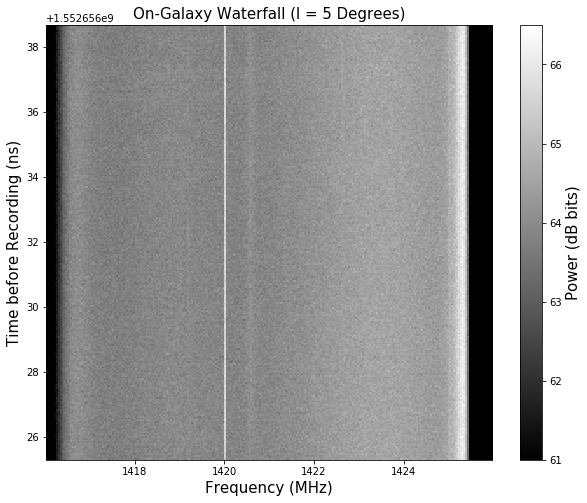

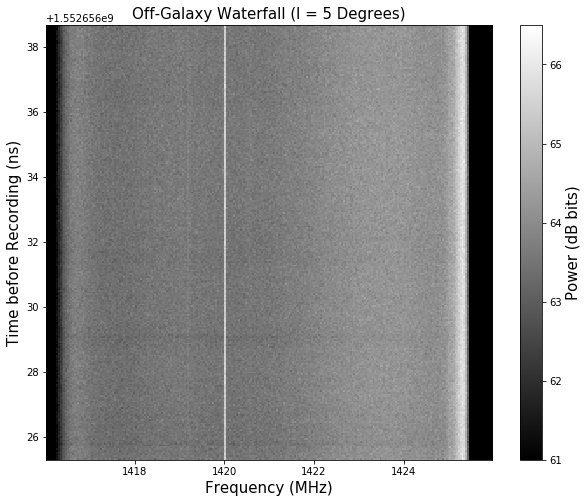

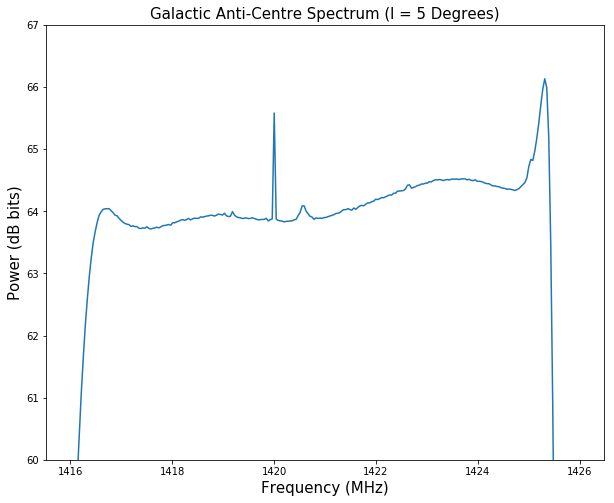

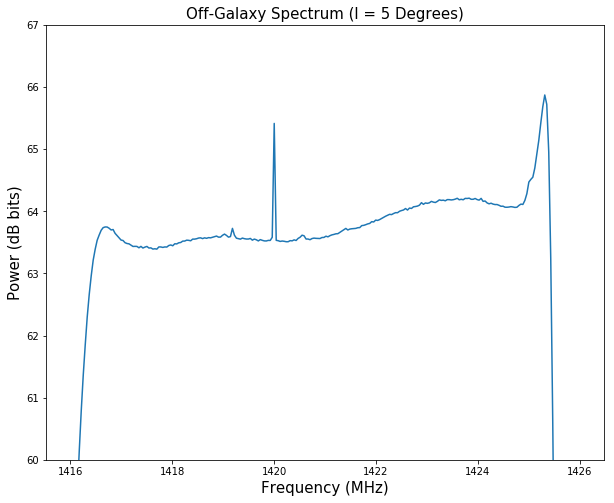

In [88]:
#Do some test plots
#Plot on-galaxy waterfall
plt.figure(figsize=(10,8))
plt.imshow(10*np.log10(all_ons[0]), aspect='auto', vmax=66.5, vmin=61, \
           extent=[np.amin(freq), np.amax(freq), np.amin(times), np.amax(times)], cmap='gray')
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Time before Recording (ns)', fontsize=15)
plt.title('On-Galaxy Waterfall (l = 5 Degrees)', fontsize=15)
plt.colorbar().set_label('Power (dB bits)', rotation=90, fontsize=15)
plt.savefig('on_gal.png')

#Plot off-galaxy waterfall
plt.figure(figsize=(10,8))
plt.imshow(10*np.log10(all_offs[0]), aspect='auto', vmax=66.5, vmin=61, \
           extent=[np.amin(freq), np.amax(freq), np.amin(times), np.amax(times)], cmap='gray')
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Time before Recording (ns)', fontsize=15)
plt.title('Off-Galaxy Waterfall (l = 5 Degrees)', fontsize=15)
plt.colorbar().set_label('Power (dB bits)', rotation=90, fontsize=15)
plt.savefig('off_gal.png')

#Plot on-galaxy spectra by taking the mean over the frequency axis
plt.figure(figsize=(10,8))
plt.plot(freqs, 10*np.log10(all_ons[0].mean(axis=0)))
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Power (dB bits)', fontsize=15)
plt.title('Galactic Anti-Centre Spectrum (l = 5 Degrees)', fontsize=15)
plt.ylim(60, 67)
plt.savefig('on_gal_spec.png')

#Plot off-galaxy spectra by taking the mean over the frequency axis
plt.figure(figsize=(10,8))
plt.plot(freqs, 10*np.log10(all_offs[0].mean(axis=0)))
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Power (dB bits)', fontsize=15)
plt.title('Off-Galaxy Spectrum (l = 5 Degrees)', fontsize=15)
plt.ylim(60, 67)
plt.savefig('off_gal_spec.png')

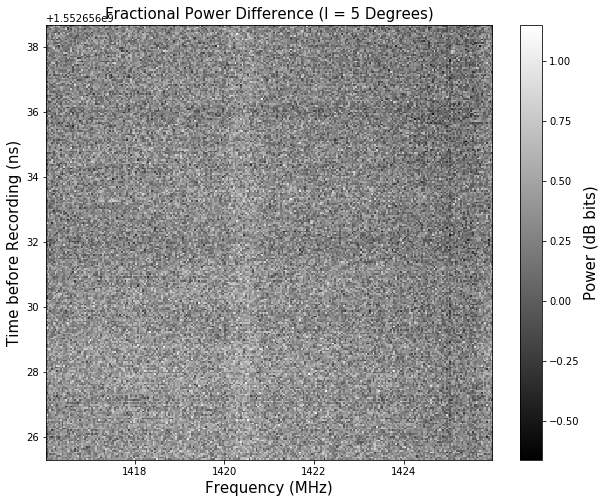

In [89]:
#Residuals - divide the on-galaxy data by the off-galaxy data to remove noise
norms = []
for i in range(0, 18):
    norms.append(all_ons[i]/all_offs[i])
norms = np.array(norms)
    
#Plot one to test
plt.figure(figsize=(10,8))
plt.imshow(10*np.log10(norms[4]), aspect='auto',\
          extent = (np.amin(freqs), np.amax(freqs), np.amin(times), np.amax(times)), cmap='gray')
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Time before Recording (ns)', fontsize=15)
plt.title('Fractional Power Difference (l = 5 Degrees)', fontsize=15)
plt.colorbar().set_label('Power (dB bits)', rotation=90, fontsize=15)
plt.savefig('frac_power_diff.png')

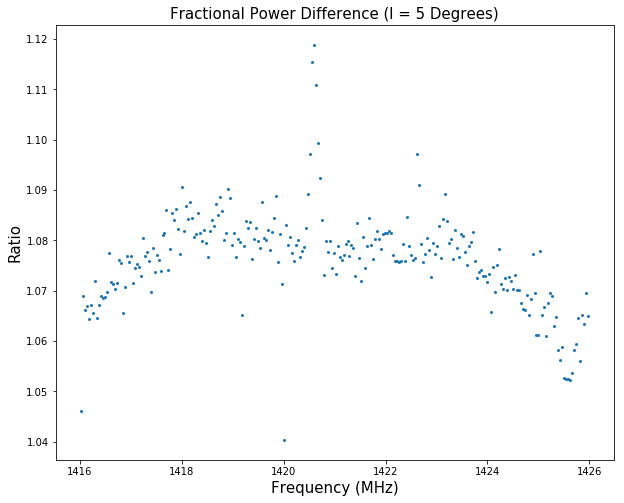

In [90]:
#Residuals in 2D by taking the mean over the frequency axis
plt.figure(figsize=(10,8))
plt.plot(freqs, norms[0].mean(axis=0), ls='', marker='o', markersize=2)
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.title('Fractional Power Difference (l = 5 Degrees)',fontsize=15)
plt.savefig('frac_power_diff_2d.png')

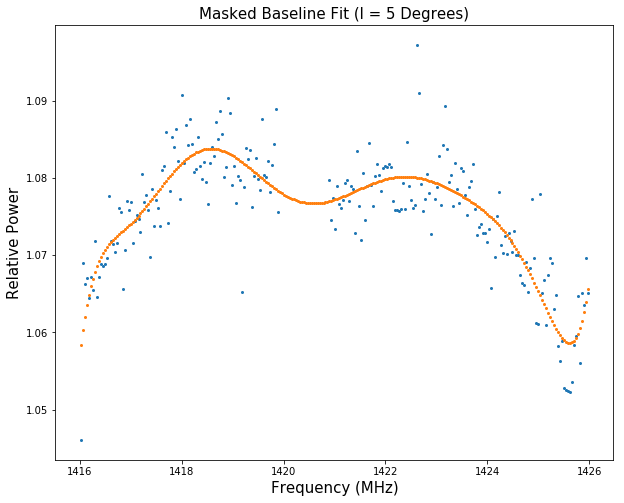

In [16]:
#De-trend the data
f21cm = 1420.4 #MHz, this is the 21cm frequency
H21cm = np.where(np.abs(freq - f21cm) > 0.5) #exclude +/- 0.5MHz of the 21cm line so that we don't remove our object of interest
deg = 9 #Fit a polynomial of degree 9
mean_residuals = []
fits = []
for i in range(0, 18):
    mean_residuals.append(norms[i].mean(axis=0)) #Take the residuals of all files
    fits.append(np.polyfit(freq[H21cm]-f21cm, mean_residuals[i][H21cm], deg)) #Apply a polynomial fit to each with 21cm removed
mean_residuals = np.array(mean_residuals) #Put residuals into array
fits = np.array(fits) #Put fits into array

#Plot to check
plt.figure(figsize=(10,8))
plt.plot(freq[H21cm], mean_residuals[0][H21cm], ls='', marker='o', markersize=2)
plt.plot(freq, np.polyval(fits[0], freq - f21cm), ls='', marker='o', markersize=2)
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Relative Power', fontsize=15)
plt.title('Masked Baseline Fit (l = 5 Degrees)', fontsize=15)
plt.savefig('de_trend.pdf')

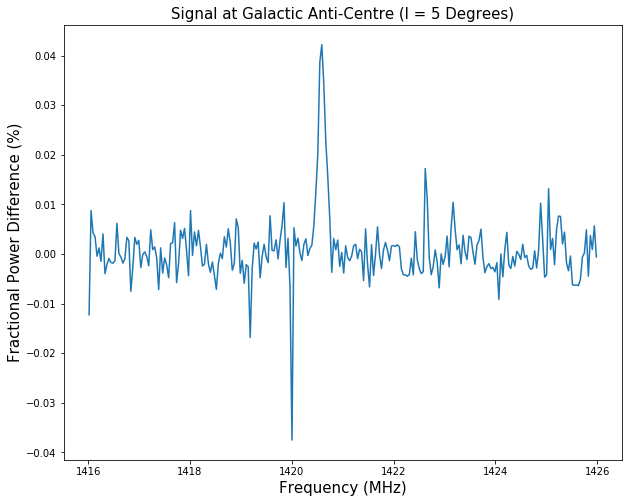

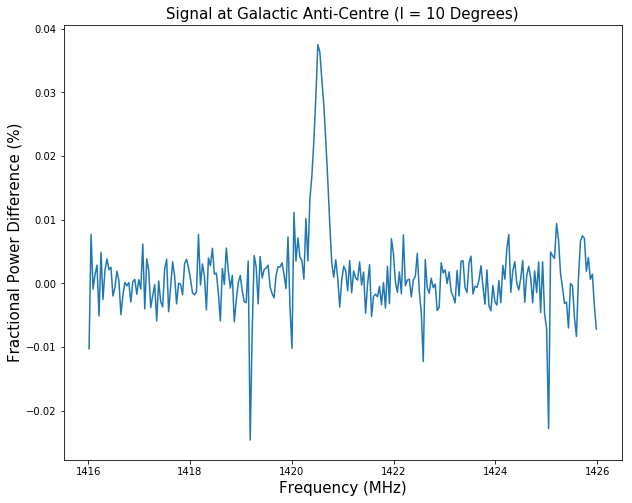

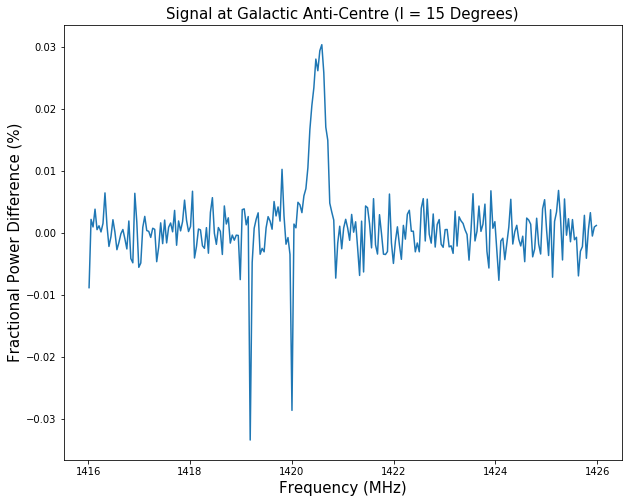

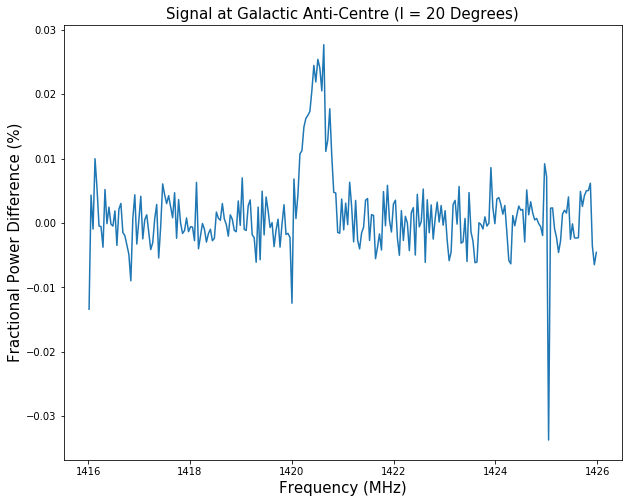

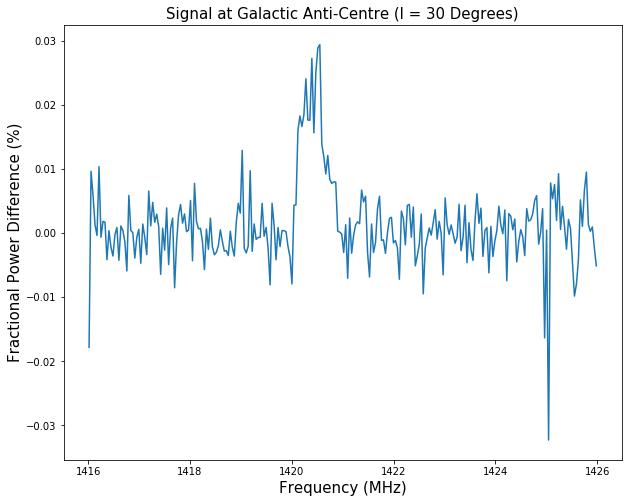

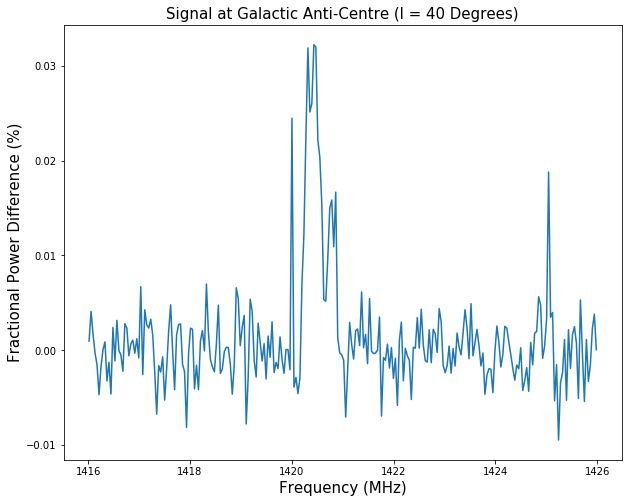

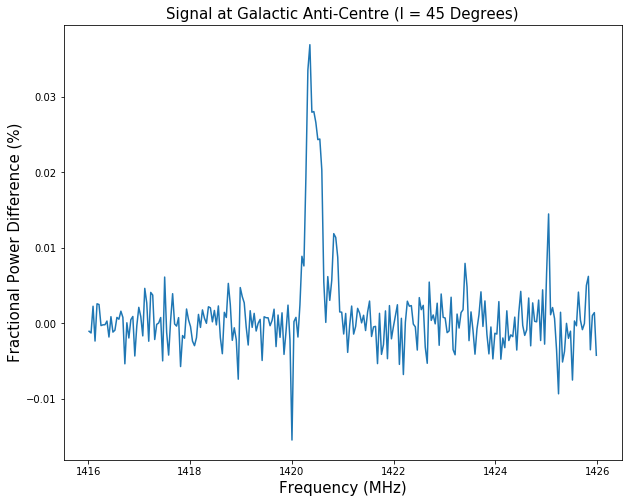

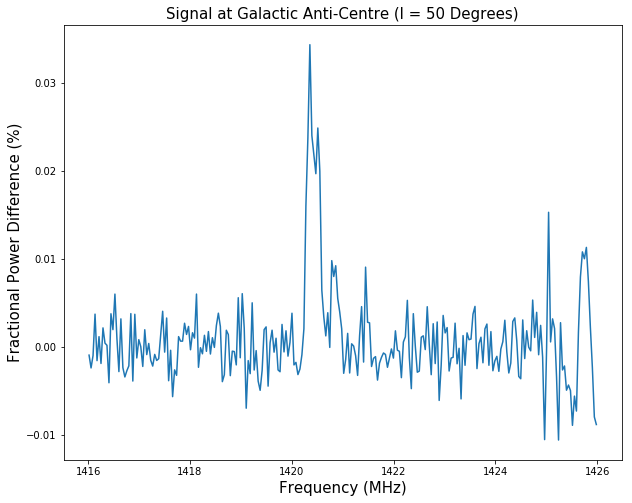

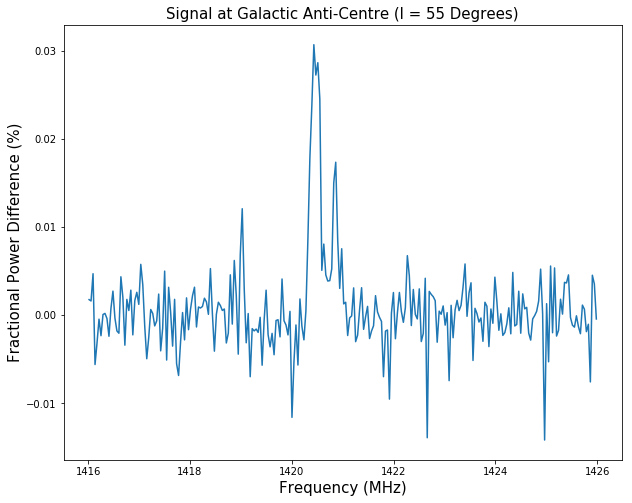

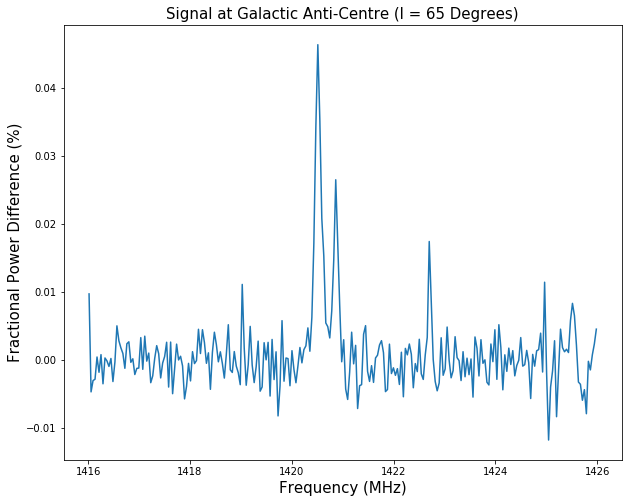

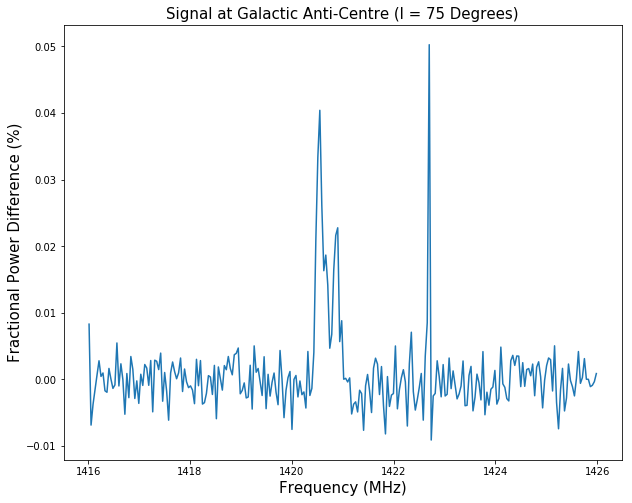

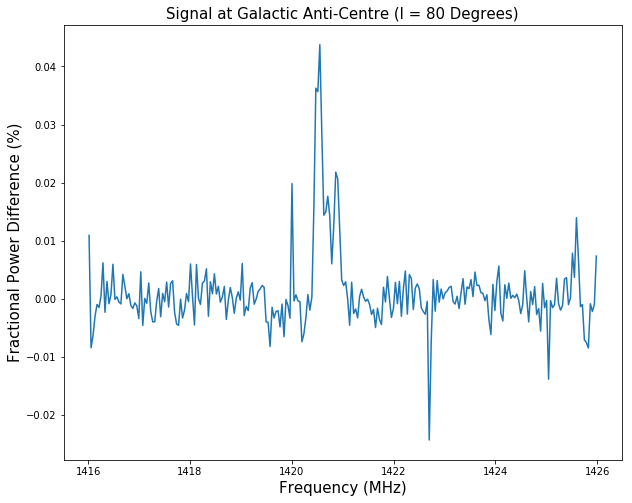

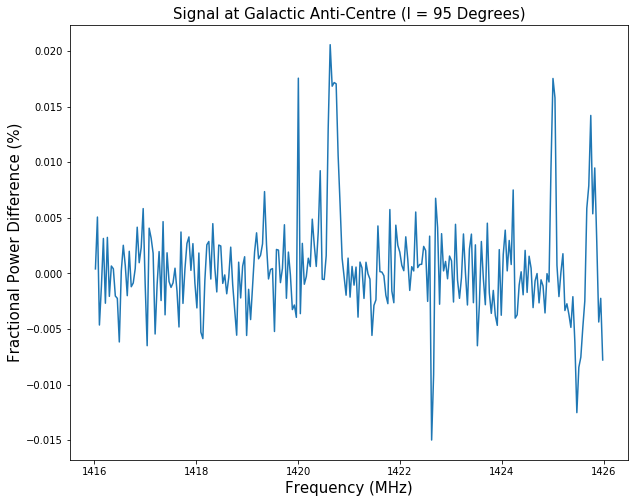

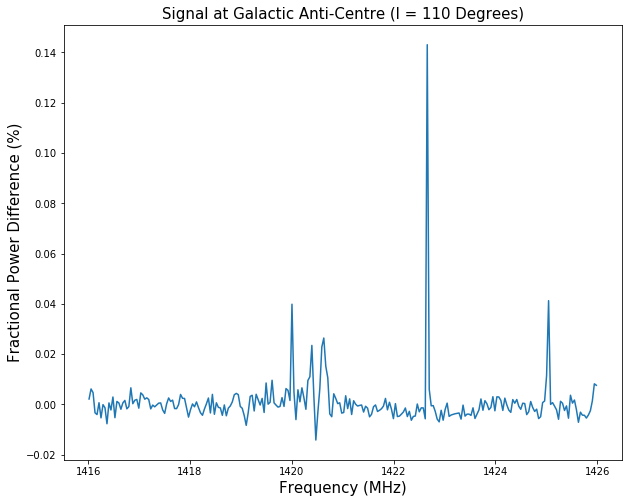

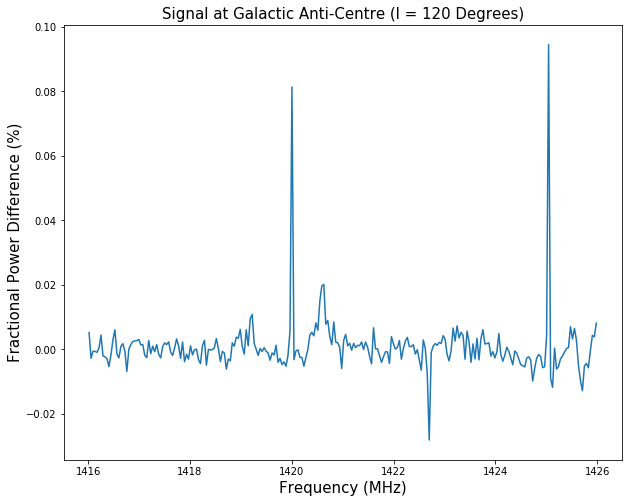

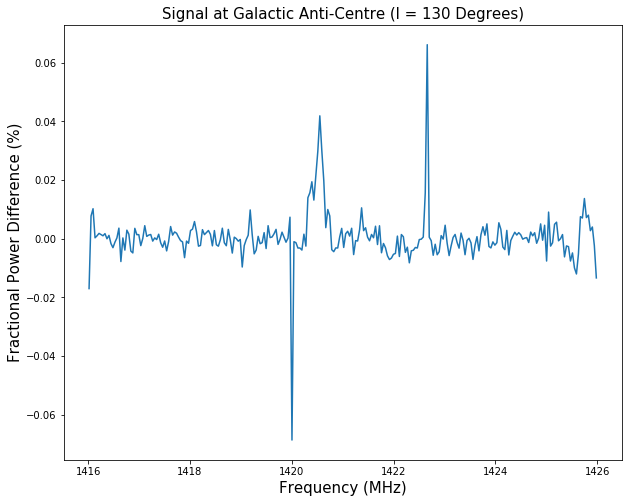

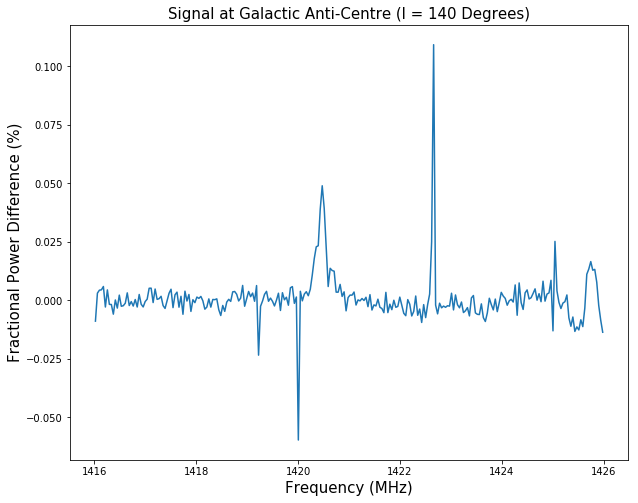

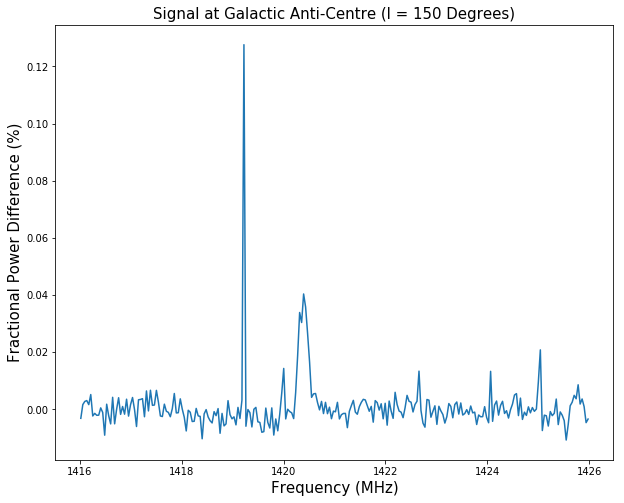

In [17]:
#De-trending data continued: subtract the polynomial fit from the data to obtain a flatter baseline
corrected_data = []
for i in range(0, 18):
    corrected_data.append(mean_residuals[i] - np.polyval(fits[i], freq-f21cm))
corrected_data = np.array(corrected_data)
#emission_line = corrected_data[:,103:153]
#emission_freq = freq[103:153]

#Plot to check
plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[0])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 5 Degrees)', fontsize=15)
plt.savefig('signal_5.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[1])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 10 Degrees)', fontsize=15)
plt.savefig('signal_10.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[2])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 15 Degrees)', fontsize=15)
plt.savefig('signal_15.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[3])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 20 Degrees)', fontsize=15)
plt.savefig('signal_20.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[4])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 30 Degrees)', fontsize=15)
plt.savefig('signal_30.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[5])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 40 Degrees)', fontsize=15)
plt.savefig('signal_40.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[6])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 45 Degrees)', fontsize=15)
plt.savefig('signal_45.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[7])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 50 Degrees)', fontsize=15)
plt.savefig('signal_50.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[8])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 55 Degrees)', fontsize=15)
plt.savefig('signal_55.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[9])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 65 Degrees)', fontsize=15)
plt.savefig('signal_65.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[10])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 75 Degrees)', fontsize=15)
plt.savefig('signal_75.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[11])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 80 Degrees)', fontsize=15)
plt.savefig('signal_80.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[12])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 95 Degrees)', fontsize=15)
plt.savefig('signal_95.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[13])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 110 Degrees)', fontsize=15)
plt.savefig('signal_110.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[14])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 120 Degrees)', fontsize=15)
plt.savefig('signal_120.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[15])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 130 Degrees)', fontsize=15)
plt.savefig('signal_130.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[16])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 140 Degrees)', fontsize=15)
plt.savefig('signal_140.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[17])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre (l = 150 Degrees)', fontsize=15)
plt.savefig('signal_150.png')


#plt.figure(figsize=(10,8))
#plt.plot(emission_freq, emission_line[0])
#plt.xlabel('Frequency (MHz)', fontsize=15)
#plt.ylabel('Fractional Power Difference (%)', fontsize=15)
#plt.title('Signal at Galactic Anti-Centre', fontsize=15)

In [18]:
#Find the noise peaks in the data using Andy's telescope peak finding function:
def centfindert(x, threshold,threshold2): #Choose thresholds
    pixels = np.arange(0,len(x))
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        #Peaks above zero
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
        #Peaks below zero
        else:
            if intensity[i] < threshold2 and intensity[i-1] > intensity[i] and intensity[i+1] > intensity[i]:
                peaksx.append(pixels[i])
                peaksy.append(intensity[i])
    peaksx = np.array(peaksx)
    return peaksx

#Remove the 21cm line so we don't remove our object of interest
no_H21cm_data = []
for i in range(0, 18):
    no_H21cm_data.append(corrected_data[i][H21cm])
no_H21cm_data = np.array(no_H21cm_data)

#Find the spikes of noise (i.e. RFI, Airspy, etc.)
noise_peaks = []
for i in range(0, 18):
    noise_peaks.append(centfindert(no_H21cm_data[i], 0.01, -0.01))
noise_peaks = np.array(noise_peaks)
print(noise_peaks)

[array([  0,  81,  98, 144, 158, 202, 206]) array([  0,  81, 143, 206])
 array([81, 97]) array([  0, 206]) array([  0,   5,  77, 204, 206])
 array([206]) array([206]) array([204, 206, 211, 223, 225])
 array([ 77, 145, 204]) array([ 77, 100, 146, 204, 206]) array([100, 146])
 array([  0, 100, 146, 206, 220]) array([144, 205, 217, 224])
 array([145, 206]) array([ 82, 146, 206, 208, 223])
 array([  0,   2, 112, 145, 220, 224])
 array([ 82, 145, 205, 206, 214, 216, 218, 220, 224, 226])
 array([ 61,  82, 145, 181, 206, 219])]


In [19]:
#Set spikes to 0
for i in range(0, 18):
    for j in range(0, len(noise_peaks[i])):
        corrected_data[i][noise_peaks[i][j]] = 0
        
#Set airspy spike to 0
for i in range(0, 18):
    corrected_data[i][102] = 0
    
#Clean up extraneous spikes
corrected_data[0][169] = 0
corrected_data[1][168] = 0
corrected_data[1][231] = 0
corrected_data[3][231] = 0
corrected_data[4][229] = 0
corrected_data[4][231] = 0
corrected_data[5][231] = 0
corrected_data[6][231] = 0
corrected_data[7][231] = 0
corrected_data[7][248] = 0
corrected_data[7][249] = 0
corrected_data[7][250] = 0
corrected_data[8][170] = 0
corrected_data[8][229] = 0
corrected_data[9][171] = 0
corrected_data[9][229] = 0
corrected_data[9][231] = 0
corrected_data[10][171] = 0
corrected_data[11][171] = 0
corrected_data[11][231] = 0
corrected_data[11][245] = 0
corrected_data[12][230] = 0
corrected_data[12][231] = 0
corrected_data[12][249] = 0
corrected_data[12][169] = 0
corrected_data[12][242] = 0
corrected_data[13][170] = 0
corrected_data[13][230] = 0
corrected_data[13][231] = 0
corrected_data[14][231] = 0
corrected_data[14][171] = 0
corrected_data[14][233] = 0
corrected_data[14][248] = 0
corrected_data[15][169] = 0
corrected_data[15][170] = 0
corrected_data[16][169] = 0
corrected_data[16][170] = 0
corrected_data[16][231] = 0
corrected_data[16][249] = 0
corrected_data[16][247] = 0
corrected_data[16][248] = 0
corrected_data[16][250] = 0
corrected_data[16][251] = 0
corrected_data[16][230] = 0
corrected_data[16][239] = 0
corrected_data[16][241] = 0
corrected_data[16][242] = 0
corrected_data[16][243] = 0
corrected_data[16][245] = 0
corrected_data[16][255] = 0
corrected_data[17][170] = 0
corrected_data[17][231] = 0

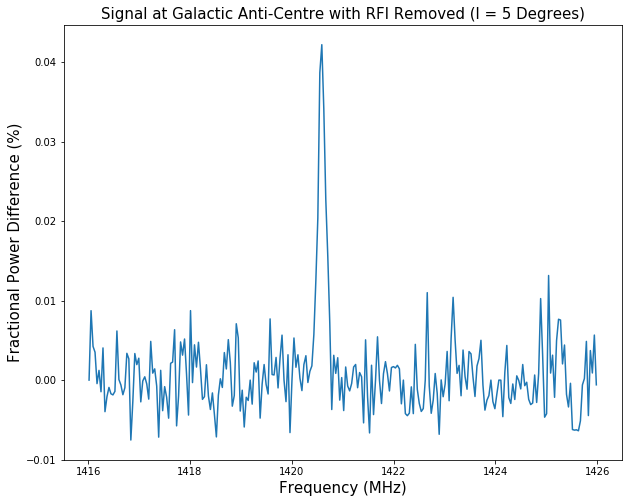

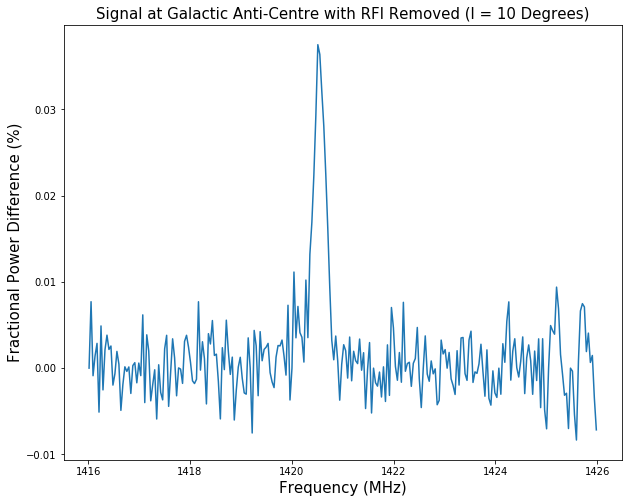

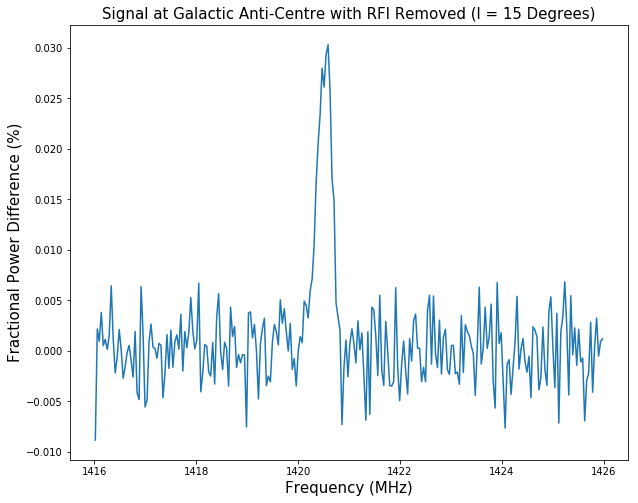

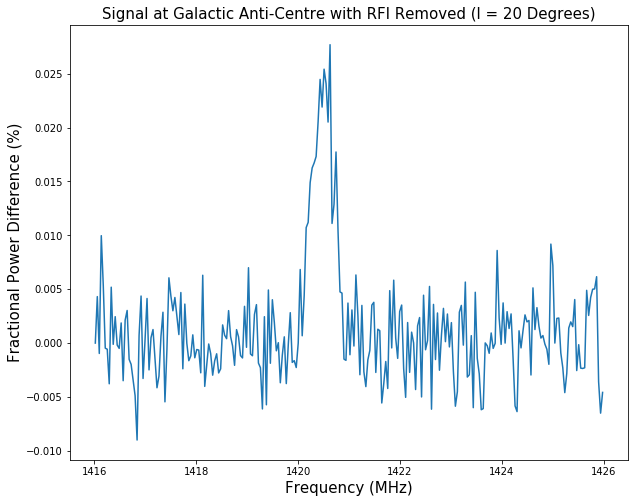

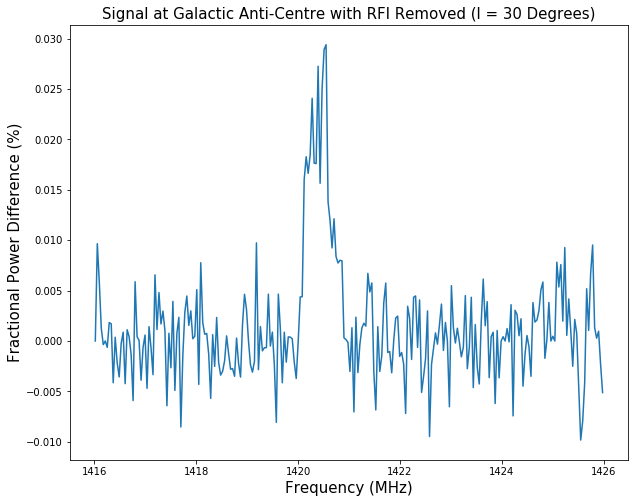

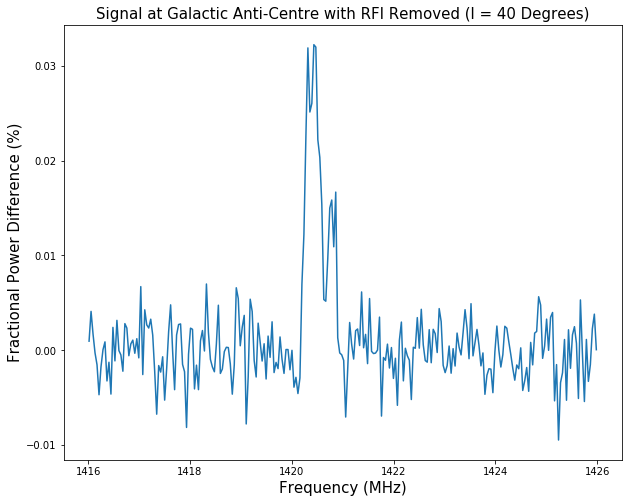

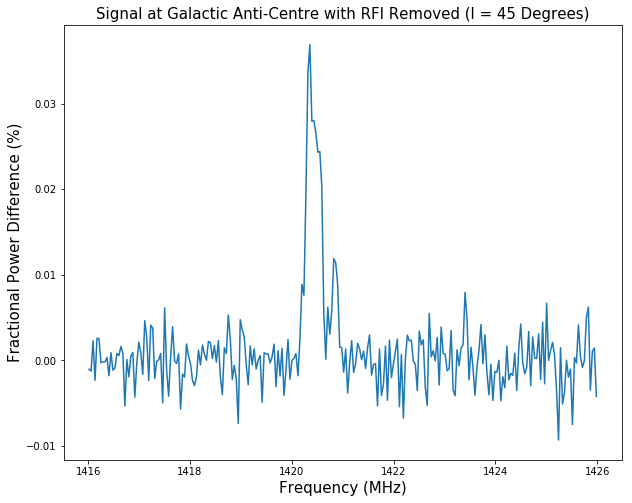

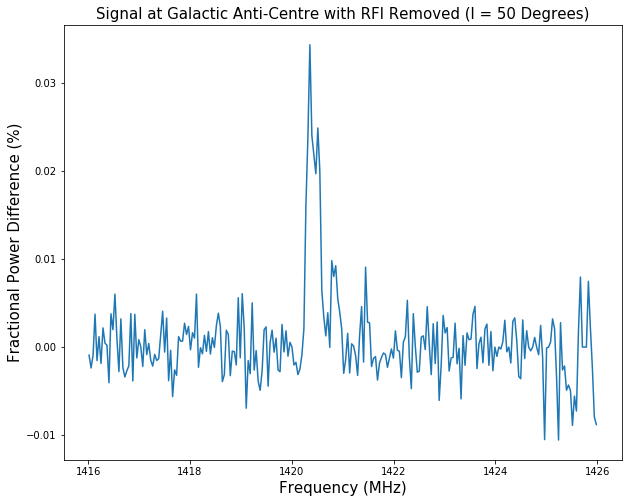

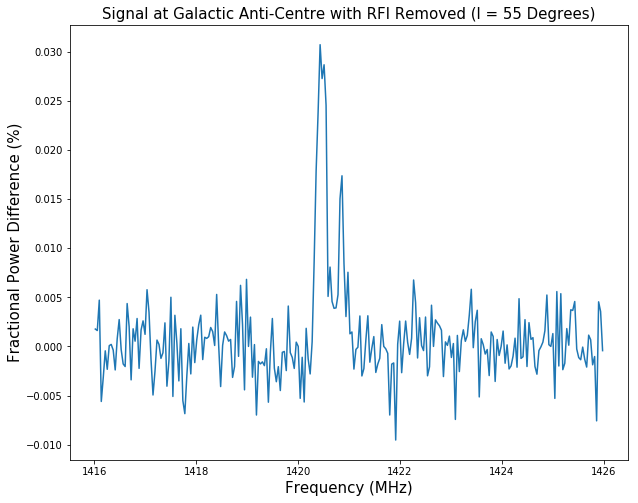

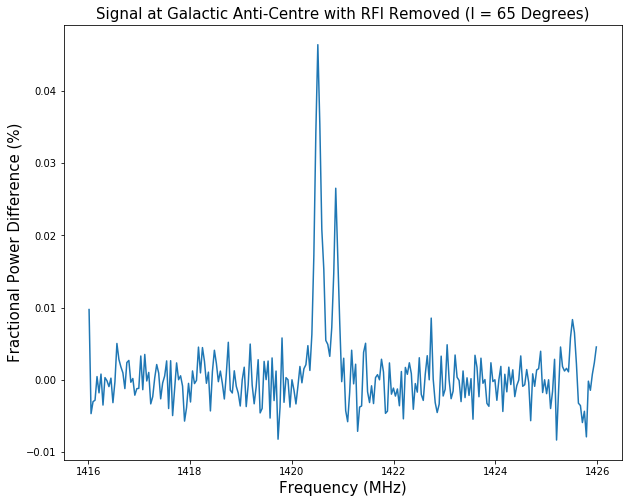

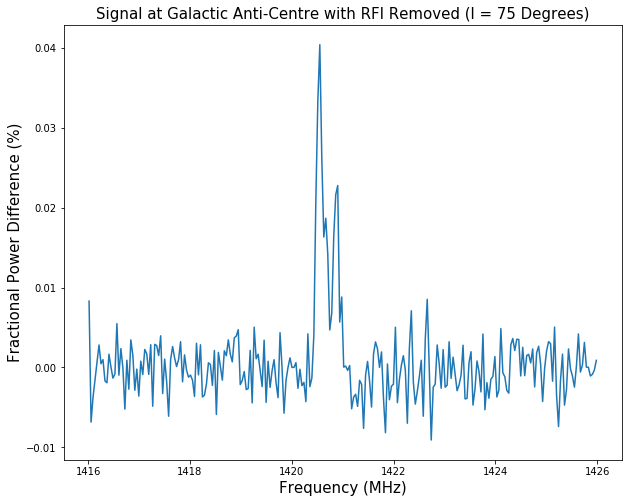

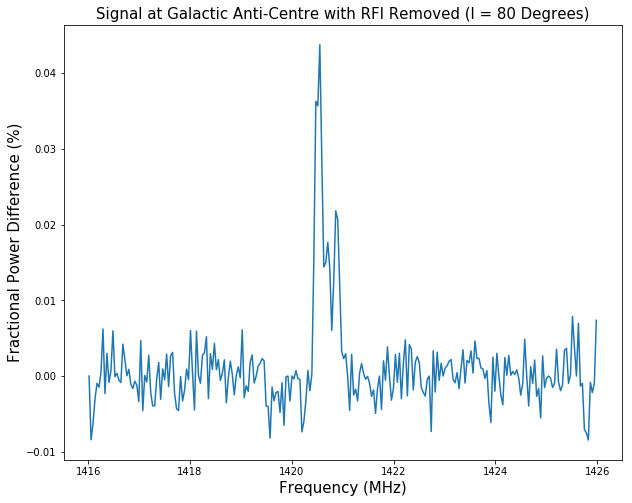

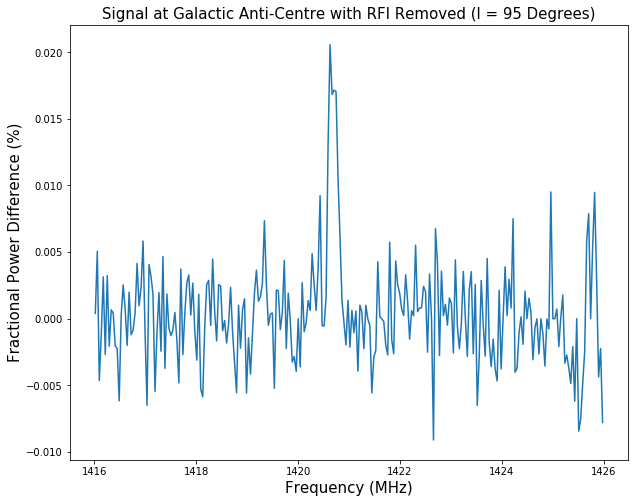

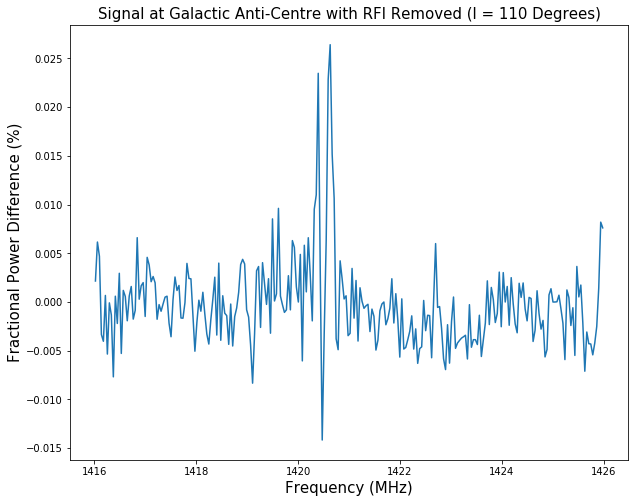

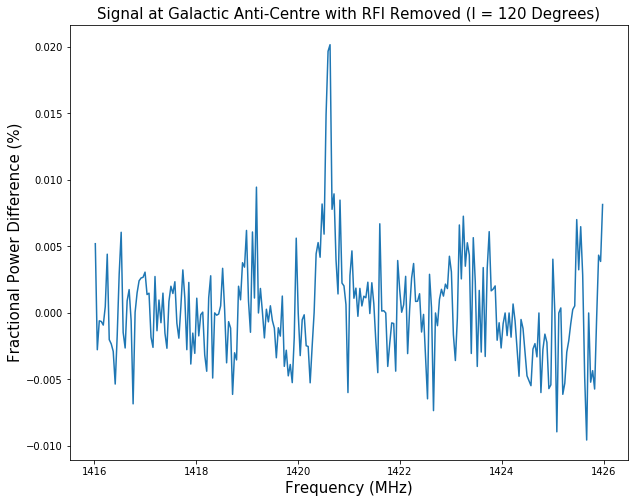

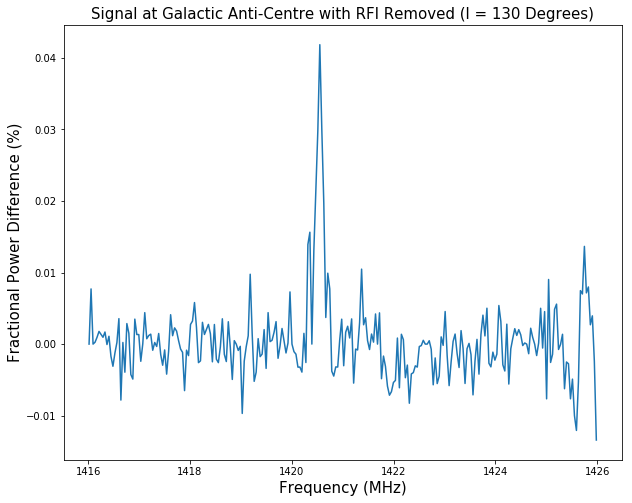

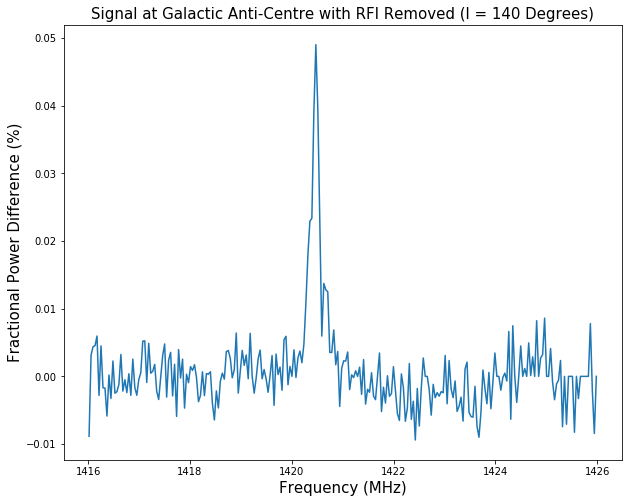

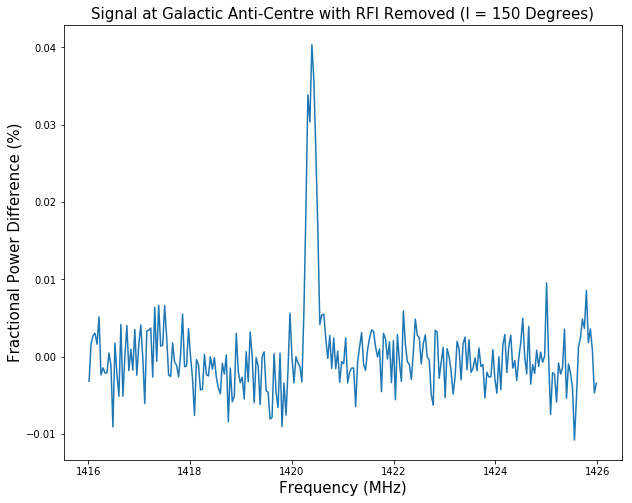

In [20]:
#Plot the new spike-less data to check
plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[0])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 5 Degrees)', fontsize=15)
plt.savefig('noiseless_5.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[1])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 10 Degrees)', fontsize=15)
plt.savefig('noiseless_10.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[2])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 15 Degrees)', fontsize=15)
plt.savefig('noiseless_15.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[3])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 20 Degrees)', fontsize=15)
plt.savefig('noiseless_20.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[4])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 30 Degrees)', fontsize=15)
plt.savefig('noiseless_30.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[5])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 40 Degrees)', fontsize=15)
plt.savefig('noiseless_40.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[6])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 45 Degrees)', fontsize=15)
plt.savefig('noiseless_45.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[7])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 50 Degrees)', fontsize=15)
plt.savefig('noiseless_50.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[8])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 55 Degrees)', fontsize=15)
plt.savefig('noiseless_55.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[9])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 65 Degrees)', fontsize=15)
plt.savefig('noiseless_65.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[10])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 75 Degrees)', fontsize=15)
plt.savefig('noiseless_75.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[11])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 80 Degrees)', fontsize=15)
plt.savefig('noiseless_80.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[12])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 95 Degrees)', fontsize=15)
plt.savefig('noiseless_95.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[13])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 110 Degrees)', fontsize=15)
plt.savefig('noiseless_110.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[14])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 120 Degrees)', fontsize=15)
plt.savefig('noiseless_120.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[15])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 130 Degrees)', fontsize=15)
plt.savefig('noiseless_130.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[16])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 140 Degrees)', fontsize=15)
plt.savefig('noiseless_140.png')

plt.figure(figsize=(10,8))
plt.plot(freq, corrected_data[17])
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre with RFI Removed (l = 150 Degrees)', fontsize=15)
plt.savefig('noiseless_150.png')

In [21]:
#Add arrays of 0s where pointing is missing 
full_data = np.zeros((31, 256))
full_data[1] = corrected_data[0]
full_data[2] = corrected_data[1]
full_data[3] = corrected_data[2]
full_data[4] = corrected_data[3]
full_data[6] = corrected_data[4]
full_data[8] = corrected_data[5]
full_data[9] = corrected_data[6]
full_data[10] = corrected_data[7]
full_data[11] = corrected_data[8]
full_data[13] = corrected_data[9]
full_data[15] = corrected_data[10]
full_data[16] = corrected_data[11]
full_data[19] = corrected_data[12]
full_data[22] = corrected_data[13]
full_data[24] = corrected_data[14]
full_data[26] = corrected_data[15]
full_data[28] = corrected_data[16]
full_data[30] = corrected_data[17]

In [22]:
#Define Gaussian fitting function
#def gauss(x, *p):
    #A, mu, sigma, base = p
    #return A*np.exp(-(x - mu)**2/(2.*sigma**2))+base

#filtered_data =[]
#for i in range(0, 19):
    #filtered_data.append(uniform_filter1d(corrected_data[i], 5))
#filtered_data = np.array(filtered_data)

#p0 = (0.03, 15, 10, 0.001)
#popts = np.zeros((19, 4))
#pcovs = np.zeros((19, 4))
#for i in range(0, 19):
    #popt,pcov = curve_fit(gauss, freq, filtered_data[i], p0=p0)
    #popts[i,0] = popt[0]
    #popts[i,1] = popt[1]
    #popts[i,2] = popt[2]
    #popts[i,3] = popt[3]
    
#plt.plot(freq,filtered_data[0])
#plt.plot(freq, gauss(freq, *popts[0]))

In [23]:
#Stack the data into arrays with the x and y-axes for peak finding
dat = []
for i in range(0, 18):
    dat.append(np.stack((freq, corrected_data[i])))
dat = np.array(dat) 

In [24]:
#Andy's function for peak and centroid finding: Peak calculator using the help
def centfinder(x):
    threshold = 0.02 #Choose an appropriate threshold based on what the data looks like
    pixels = x[0,:]
    intensity = x[1,:]
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
                
    #Calculate the FWHM to compute the size of the peak that we will care about, and then the centroid
    cen = []
    for i in range(len(peaksy)):
        halfmax = peaksy[i]/2
        peak_index = peak_dex.index(peaksy[i])
        pind=(list(inversep_dex)).index(peaksy[i])
        
        for i in range(len((intensity[0:pind]))):
            xmin = (inversep_dex[pind:-1][i] - halfmax)
            xmins = peak_index-i+1
            if xmin < 0:
                break

        for i in range(len((intensity[0:peak_index] - halfmax))):
            xmax = (intensity[peak_index:-1][i] - halfmax)
            xmaxs = peak_index+i-1
            if xmax < 0:
                break
        
        x_range = x[0][xmins:xmaxs]
        y_range = x[1][xmins:xmaxs]

        frequency = np.sum(x_range*y_range)/ np.sum(y_range)
        frequency
        cen.append(frequency)
    return cen

#Write a similar function to find the FWHM for error
def FWHM(x):
    threshold = 0.02 #Choose an appropriate threshold based on what the data looks like
    pixels = x[0,:]
    intensity = x[1,:]
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
                
    #Calculate the FWHM to compute the size of the peak that we will care about, and then the centroid
    cen = []
    for i in range(len(peaksy)):
        halfmax = peaksy[i]/2
        peak_index = peak_dex.index(peaksy[i])
        pind=(list(inversep_dex)).index(peaksy[i])
        
        for i in range(len((intensity[0:pind]))):
            xmin = (inversep_dex[pind:-1][i] - halfmax)
            xmins = peak_index-i+1
            if xmin < 0:
                break

        for i in range(len((intensity[0:peak_index] - halfmax))):
            xmax = (intensity[peak_index:-1][i] - halfmax)
            xmaxs = peak_index+i-1
            if xmax < 0:
                break
        
        x_range = x[0][xmins:xmaxs]
        y_range = x[1][xmins:xmaxs]
        
        if len(x_range) >= 2:
            FWHM = x_range[-1] - x_range[0]

    return FWHM

In [25]:
#Find the centroids
centroids = []
for i in range(0, 18):
    centroids.append(centfinder(dat[i]))
    
#Put them into an array
for i in range(0, 18):
     centroids[i] = np.array(centroids[i])
centroids = np.array(centroids)

#Remove nan values
cent = np.zeros_like(centroids)
for i in range(0, 18):
    cent[i] = centroids[i][~np.isnan(centroids[i])]
print(cent)

[array([1420.5883], dtype=float32) array([1420.535], dtype=float32)
 array([1420.5177, 1420.5049], dtype=float32)
 array([1420.4302, 1420.4302, 1420.4302], dtype=float32)
 array([1420.3588, 1420.3588, 1420.3337], dtype=float32)
 array([1420.3958, 1420.3958], dtype=float32)
 array([1420.4104, 1420.4104, 1420.4104], dtype=float32)
 array([1420.4087, 1420.396 ], dtype=float32)
 array([1420.4413, 1420.4413], dtype=float32)
 array([1420.4952, 1420.8492], dtype=float32)
 array([1420.5198, 1420.8464], dtype=float32)
 array([1420.5142, 1420.5142, 1420.869 ], dtype=float32)
 array([1420.6702], dtype=float32) array([1420.6108], dtype=float32)
 array([1420.5731], dtype=float32) array([1420.5201], dtype=float32)
 array([1420.4553], dtype=float32)
 array([1420.3655, 1420.3772], dtype=float32)]


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in float_scalars


In [26]:
#Calculate centroid error
cent_FWHM = []
for i in range(0, 18):
    cent_FWHM.append(FWHM(dat[i]))
cent_FWHM.insert(3, 0.2734375)
cent_FWHM.insert(5, 0.3515625)
cent_FWHM.insert(6, 0.3515625)
cent_FWHM.insert(8, 0.390625)
cent_FWHM.insert(9, 0.390625)
cent_FWHM.insert(11, 0.234375)
cent_FWHM.insert(13, 0.2734375)
cent_FWHM.insert(14, 0.2734375)
cent_FWHM.insert(16, 0.234375)
cent_FWHM.insert(18, 0.15625)
cent_FWHM.insert(20, 0.0390625)
cent_FWHM.insert(22, 0.0390625)
cent_FWHM.insert(24, 0.078125)
cent_FWHM.insert(25, 0.078125)
cent_FWHM.insert(33, 0.1171875)
cent_FWHM = np.array(cent_FWHM) #This is the error in the centroids

In [27]:
#Find radial velocities for each peak
c = 3e8 #Speed of light, m/s
v_rad = []
for i in range(0, 18):
    v_rad.append(c*((1420.4 - cent[i])/cent[i])/1000) #Use Doppler shift formula, divide by 1000 to get in units of km/s
v_rad = np.array(v_rad)

#Put radial velocities into an array
v_rad_array = []
for i in range(0, 18):
    for j in range(0, len(v_rad[i])):
        v_rad_array.append(v_rad[i][j])
v_rad_array = np.array(v_rad_array)

#Create new galactic longitude array (sometimes multiple peaks for each pointing)
longs = np.array((5, 10, 15, 15, 20, 20, 20, 30, 30, 30, 40, 40, 45, 45, 45, 50, 50, 55, 55, 65, 65, 75, \
                  75, 80, 80, 80, 95, 110, 120, 130, 140, 150, 150))

#Calculate error using quadrature
v_rad_err = np.zeros_like(cent)
for i in range(0, 18):
    v_rad_err[i] = np.abs(v_rad[i]*np.sqrt((cent_FWHM[i]/(1420-cent[i]))**2*(cent_FWHM[i]/cent[i])**2))
    
#Put error into array
vrad_err_array = []
for i in range(0, 18):
    for j in range(0, len(v_rad_err[i])):
        vrad_err_array.append(v_rad_err[i][j])
vrad_err_array = np.array(vrad_err_array)

#Assume a reading error of 0.05 degrees
gal_long_err = np.full((33,), 0.05)

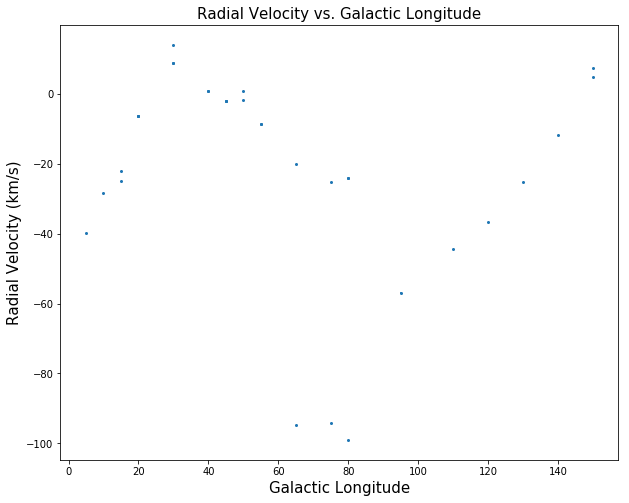

In [28]:
#Plot radial velocity vs. longitude
plt.figure(figsize=(10,8))
plt.errorbar(longs, v_rad_array, xerr=gal_long_err, yerr=vrad_err_array, ls='', marker='o', markersize=2)
plt.title('Radial Velocity vs. Galactic Longitude', fontsize=15)
plt.xlabel('Galactic Longitude', fontsize=15)
plt.ylabel('Radial Velocity (km/s)', fontsize=15)
plt.savefig('rad_vel.pdf')

In [29]:
#Try finding points above a threshold
#above_thresh = []
#for i in range(0, 18):
    #above_thresh.append(np.argwhere(emission_line[i] > 0.02))
#above_thresh = np.array(above_thresh)

#maxes = np.zeros(18)
#for i in range(0, 18):
    #maxes[i] = np.max(above_thresh[i])
#maxes = maxes.astype(int)

#peak_freqs = np.zeros(18)
#for i in range(0, 18):
    #peak_freqs[i] = emission_freq[maxes[i]]

#v_rads = c*((1420.4 - peak_freqs)/peak_freqs)/1000
#gal_long = np.arange(0, 150, 150/18)

#plt.figure(figsize=(10,8))
#plt.plot(gal_long, v_rads, ls='', marker='o', markersize=2)
#plt.title('Radial Velocity vs. Galactic Longitude', fontsize=15)
#plt.xlabel('Galactic Longitude', fontsize=15)
#plt.ylabel('Radial Velocity (km/s)', fontsize=15)

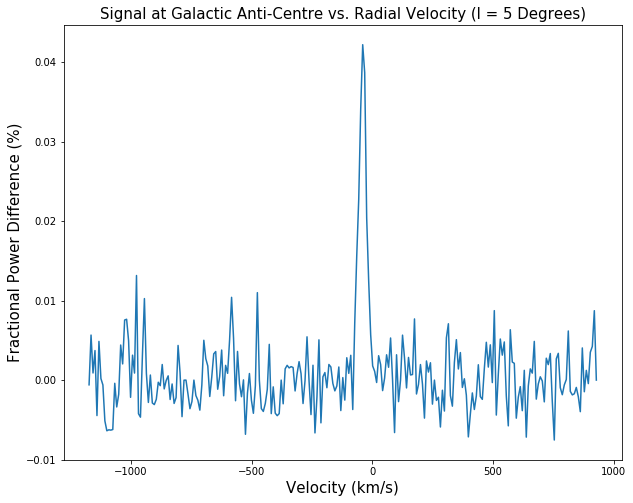

In [30]:
#Shift frequency axis to velocity
velocity = c*((1420.4 - freq)/freq)/1000 #Use Doppler shift formula and divide by 1000 to get in units of km/s
plt.figure(figsize=(10,8))
plt.plot(velocity, corrected_data[0])
plt.xlabel('Velocity (km/s)', fontsize=15)
plt.ylabel('Fractional Power Difference (%)', fontsize=15)
plt.title('Signal at Galactic Anti-Centre vs. Radial Velocity (l = 5 Degrees)', fontsize=15)
plt.savefig('rad_vel_axis.pdf')

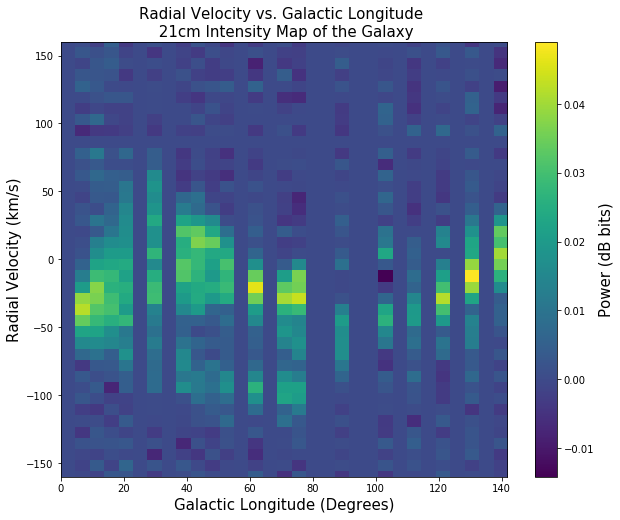

In [64]:
#Map the Galaxy
gal_long = np.arange(0, 150, 150/18) #Create array for longitudes
plt.figure(figsize=(10,8))
plt.imshow(full_data.T, aspect='auto', extent=(np.amin(gal_long), np.amax(gal_long), \
                                                            np.amin(velocity), np.amax(velocity)))
plt.title('Radial Velocity vs. Galactic Longitude \n 21cm Intensity Map of the Galaxy', fontsize=15)
plt.xlabel('Galactic Longitude (Degrees)', fontsize=15)
plt.ylabel('Radial Velocity (km/s)', fontsize=15)
plt.colorbar().set_label('Power (dB bits)', rotation=90, fontsize=15)
plt.ylim(-160,160)
plt.savefig('map.pdf')

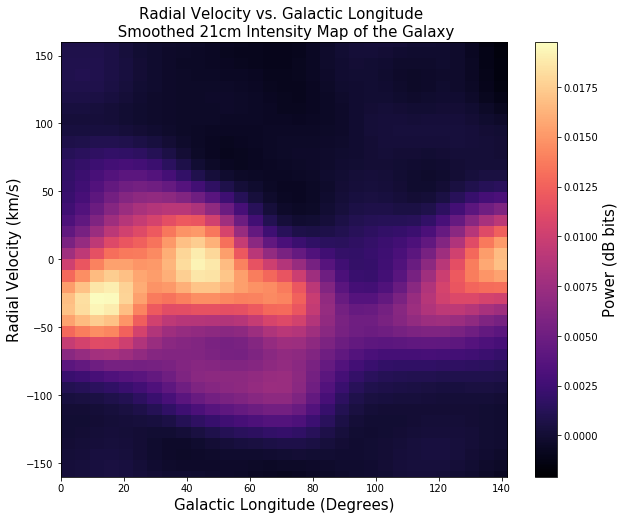

In [65]:
#Use a 2D gaussian filter to smooth so structure can be seen more clearly
smoothed_map = gaussian_filter(full_data.T, 2)
plt.figure(figsize=(10,8))
plt.imshow(smoothed_map, aspect='auto', extent=(np.amin(gal_long), np.amax(gal_long), np.amin(velocity), \
                                                np.amax(velocity)), cmap='magma')
plt.title('Radial Velocity vs. Galactic Longitude \n Smoothed 21cm Intensity Map of the Galaxy', fontsize=15)
plt.xlabel('Galactic Longitude (Degrees)', fontsize=15)
plt.ylabel('Radial Velocity (km/s)', fontsize=15)
plt.colorbar().set_label('Power (dB bits)', rotation=90, fontsize=15)
plt.ylim(-160,160)
plt.savefig('smooth_map.pdf')

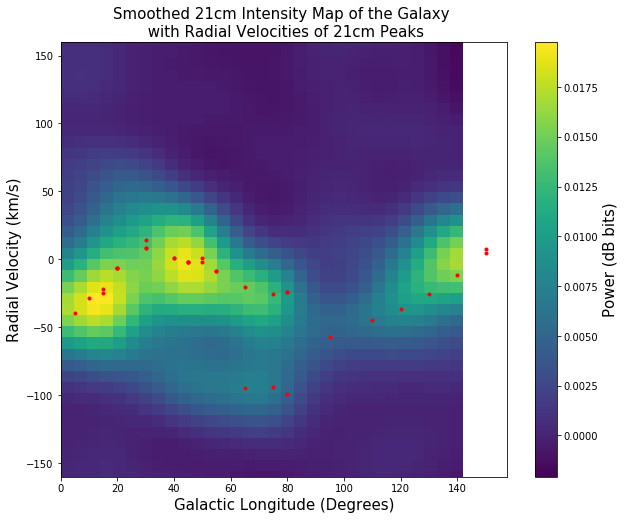

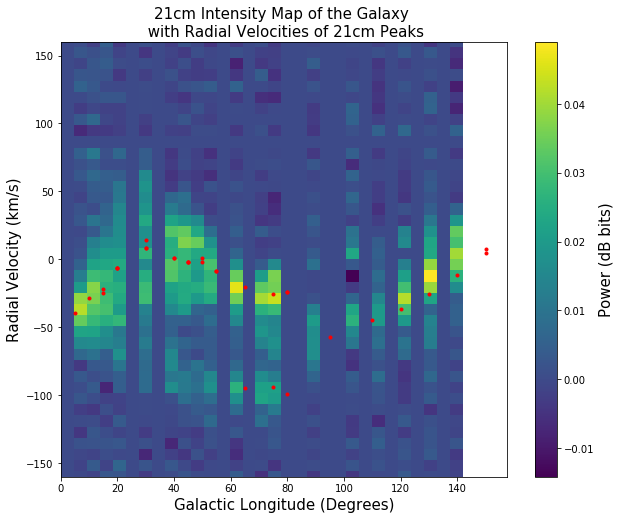

In [91]:
#Plot radial velocity of peaks over map
plt.figure(figsize=(10,8))
plt.imshow(smoothed_map, aspect='auto', extent=(np.amin(gal_long), np.amax(gal_long), np.amin(velocity), \
                                                np.amax(velocity)))
plt.plot(longs, v_rad_array, ls='', marker='o', markersize=3, color='r')
plt.title('Smoothed 21cm Intensity Map of the Galaxy \n with Radial Velocities of 21cm Peaks', fontsize=15)
plt.xlabel('Galactic Longitude (Degrees)', fontsize=15)
plt.ylabel('Radial Velocity (km/s)', fontsize=15)
plt.colorbar().set_label('Power (dB bits)', rotation=90, fontsize=15)
plt.ylim(-160,160)
plt.savefig('smooth_map_radvel.pdf')

plt.figure(figsize=(10,8))
plt.imshow(full_data.T, aspect='auto', extent=(np.amin(gal_long), np.amax(gal_long), \
                                                            np.amin(velocity), np.amax(velocity)))
plt.plot(longs, v_rad_array, ls='', marker='o', markersize=3, color='r')
plt.title('21cm Intensity Map of the Galaxy \n with Radial Velocities of 21cm Peaks', fontsize=15)
plt.xlabel('Galactic Longitude (Degrees)', fontsize=15)
plt.ylabel('Radial Velocity (km/s)', fontsize=15)
plt.colorbar().set_label('Power (dB bits)', rotation=90, fontsize=15)
plt.ylim(-160,160)
plt.savefig('map_radvel.pdf')

In [33]:
#Calculate rotational velocities with v_rads
R0 = 8 #kpc, solar circle radius
def R_min(R0, l):
    Rmin = np.abs(R0*np.sin(l))
    return Rmin

V0 = 220 #km, orbital velocity 
def V_rot(v_r, V0, l):
    Vrot = np.abs(v_r + V0*np.sin(l))
    return Vrot

#r_min = R_min(R0, gal_long)
#v_rot = V_rot(v_rads, V0, gal_long)

In [34]:
#Plot the rotation curve
#plt.figure(figsize=(10,8))
#plt.plot(r_min, v_rot, ls='', marker='o', markersize=3)
#plt.xlabel('Radius (kpc)', fontsize=15)
#plt.ylabel('Rotational Velocity (km/s)', fontsize=15)
#plt.title('Rotation Curve of the Milky Way', fontsize=15)

In [35]:
print(v_rad_array[0:27])
print(longs[0:27])

[-39.750946  -28.512447  -24.85202   -22.14531    -6.3680778  -6.3680778
  -6.3680778   8.71465     8.71465    14.000409    0.9023811   0.9023811
  -2.1914744  -2.1914744  -2.1914744  -1.8305278   0.8508163  -8.714144
  -8.714144  -20.108799  -94.84865   -25.290245  -94.256035  -24.104458
 -24.104458  -99.022675  -57.045246 ]
[ 5 10 15 15 20 20 20 30 30 30 40 40 45 45 45 50 50 55 55 65 65 75 75 80
 80 80 95]


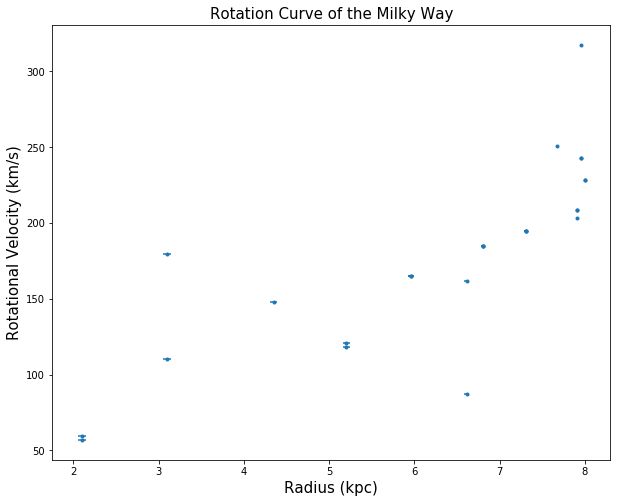

In [36]:
#Tangent point calculations
gal_long_centroid = np.arange(0, 80, 80/len(v_rad_array[0:26])) #Create array for longitudes
r_min_centroid = R_min(R0, longs[0:26]) #Calculate R_min
v_rot_centroid = V_rot(v_rad_array[0:26], V0, longs[0:26]) #Calculate rotational velocity

r_min_err = np.cos(longs[0:26])*gal_long_err[0:26] #Calculate error in radius
v_rot_err = np.sqrt(vrad_err_array[0:26]**2 + (np.cos(longs[0:26])*gal_long_err[0:26])**2) #Calculate error in rotational velocity

#Plot the rotation curve
plt.figure(figsize=(10,8))
plt.errorbar(r_min_centroid, v_rot_centroid, xerr=r_min_err, yerr=v_rot_err, ls='', marker='o', markersize=3)
plt.xlabel('Radius (kpc)', fontsize=15)
plt.ylabel('Rotational Velocity (km/s)', fontsize=15)
plt.title('Rotation Curve of the Milky Way', fontsize=15)
plt.savefig('rot_curve.pdf')

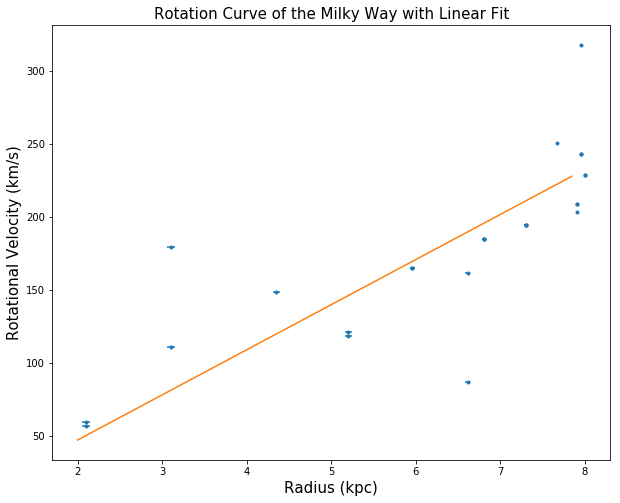

In [37]:
#Fit a linear curve
#Define linear function
def model_linear(x,a,b):
    return a*x + b

radius = np.arange(2, 8, 8/len(r_min_centroid)) #Create array for radius data
#Curve fitting
popt, pcov = curve_fit(model_linear, r_min_centroid, v_rot_centroid, p0=(1,0), sigma=v_rot_err, absolute_sigma=True)

#Plot rotation curve with linear curve fitting
plt.figure(figsize=(10,8))
plt.errorbar(r_min_centroid, v_rot_centroid, xerr=r_min_err, yerr=v_rot_err, ls='', marker='o', markersize=3)
plt.plot(radius, model_linear(radius, *popt))
plt.xlabel('Radius (kpc)', fontsize=15)
plt.ylabel('Rotational Velocity (km/s)', fontsize=15)
plt.title('Rotation Curve of the Milky Way with Linear Fit', fontsize=15)
plt.savefig('rot_curve_linfit.pdf')

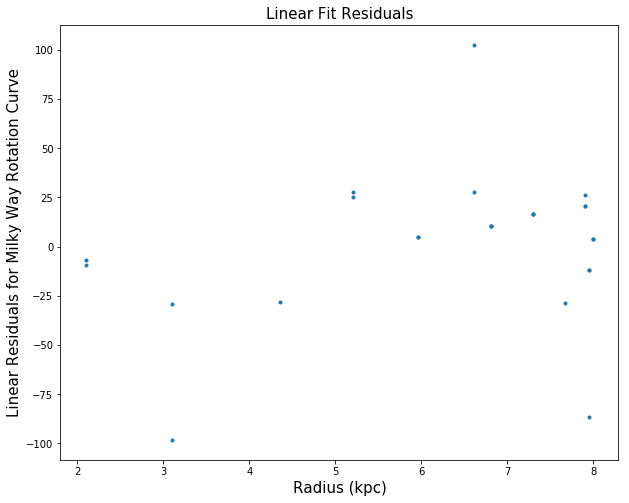

In [38]:
#Linear residuals to check goodness of fit
linear_fit = model_linear(r_min_centroid, *popt)
linear_residual = linear_fit - v_rot_centroid

#Plot linear residuals
plt.figure(figsize=(10,8))
plt.plot(r_min_centroid, linear_residual, ls='', marker='o', markersize=3)
plt.title('Linear Fit Residuals', fontsize=15)
plt.xlabel('Radius (kpc)', fontsize=15)
plt.ylabel('Linear Residuals for Milky Way Rotation Curve', fontsize=15)
plt.savefig('lin_residuals.pdf')

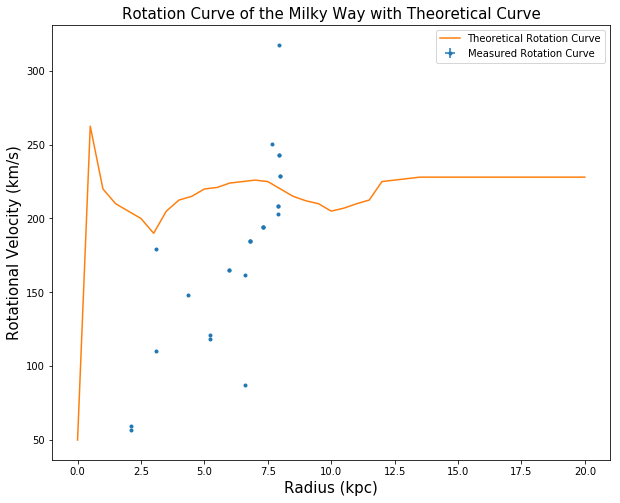

In [39]:
#Fit approximate theoretical MW rotation curve (based on one in CO)
x_array = np.arange(0, 20.5, 0.5)
y_array = np.array((50, 262.5, 220, 210, 205, 200, 190, 205, 212.5, 215, 220, 221, 224, 225, 226, 225, \
                    220, 215, 212, 210, 205, 207, 210, 212.5, 225, 226, 227, 228, 228, 228, 228, 228, 228, 228, \
                    228, 228, 228, 228, 228, 228, 228))

plt.figure(figsize=(10,8))
plt.errorbar(r_min_centroid, v_rot_centroid, xerr=r_min_err, yerr=v_rot_err, ls='', marker='o', markersize=3, label='Measured Rotation Curve')
plt.plot(x_array, y_array, label='Theoretical Rotation Curve')
plt.xlabel('Radius (kpc)', fontsize=15)
plt.ylabel('Rotational Velocity (km/s)', fontsize=15)
plt.title('Rotation Curve of the Milky Way with Theoretical Curve', fontsize=15)
plt.legend()
plt.savefig('rot_theory.pdf')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


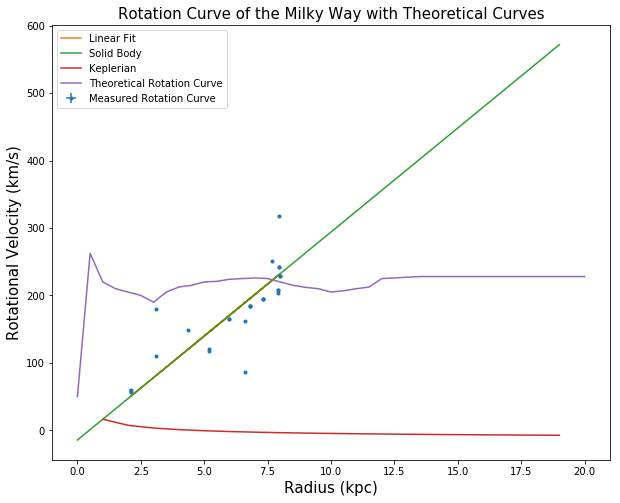

In [40]:
#Other theoretical curves
solid_body = popt[0]*np.arange(0, 20)+popt[1]
keplerian = popt[0]*(1/np.sqrt(np.arange(0, 20)))+popt[1]

plt.figure(figsize=(10,8))
plt.errorbar(r_min_centroid, v_rot_centroid, xerr=r_min_err, yerr=v_rot_err, ls='', marker='o', markersize=3, label='Measured Rotation Curve')
plt.plot(r_min_centroid, model_linear(r_min_centroid, *popt), label='Linear Fit')
plt.plot(np.arange(0, 20), solid_body, ls='-', label='Solid Body')
plt.plot(np.arange(0, 20), keplerian, ls='-', label='Keplerian')
plt.plot(x_array, y_array, label='Theoretical Rotation Curve')
plt.xlabel('Radius (kpc)', fontsize=15)
plt.ylabel('Rotational Velocity (km/s)', fontsize=15)
plt.title('Rotation Curve of the Milky Way with Theoretical Curves', fontsize=15)
plt.legend()
plt.savefig('all_fits.pdf')

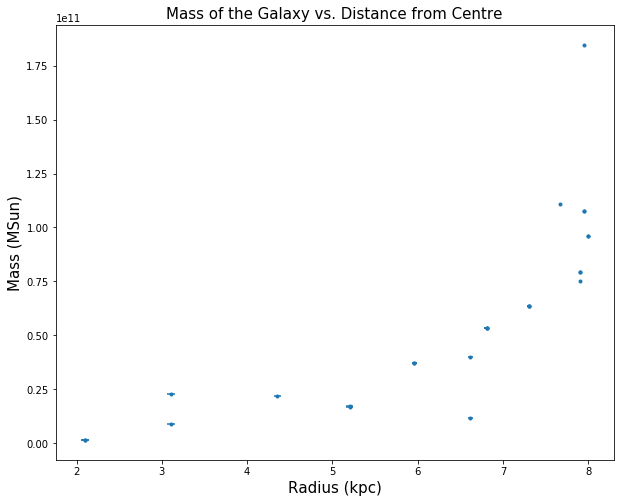

In [41]:
#Enclosed mass - formula from ERA textbook
MSun = 1.9891e30 #kg
M_galaxy = (2.3e5)*((v_rot_centroid)**2)*(r_min_centroid) #units of MSun
mass_err = M_galaxy*np.sqrt(((2*v_rot_err)/(v_rot_centroid**2))**2 + (r_min_err/r_min_centroid)**2)
                            
plt.figure(figsize=(10,8))
plt.errorbar(r_min_centroid, M_galaxy, xerr=r_min_err, yerr=mass_err, ls='', marker='o', markersize=3)
plt.title('Mass of the Galaxy vs. Distance from Centre', fontsize=15)
plt.xlabel('Radius (kpc)', fontsize=15)
plt.ylabel('Mass (MSun)', fontsize=15)
plt.savefig('mass.pdf')

In [42]:
#Mass enclosed within 8kpc:
v_rot_8kpc = v_rot_centroid[25] #This is where the max v_rot occurs, and we can see the max v_rot occurs at 8kpc from the plots
M_enc = (2.3e5)*((v_rot_8kpc)**2)*(8) #units of MSun, luminous matter within R0 estimated to be 8.8e10Msun (CO)
M_enc_err = 2*v_rot_err[25] #Error in M_enc
print(M_enc)
print(M_enc_err)

185691742085.73193
0.014123725561174916
